In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
w = 10
b = 10
alpha = 0.1
x = np.array([1, 2, 3, 4, 5], dtype = float)
y = np.array([3, 5, 7, 9 , 11], dtype= float)


In [41]:
def compute_cost(w, x, b, y):
    cost = 0.0
    m = x.shape[0]

    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i]) **2
    
    cost = cost/(2 * m)
    return cost

In [42]:
def compute_gradient(w, b, x, y):

    dj_dw = 0.0
    dj_db = 0.0
    m = x.shape[0]
    for i in range(m):
        f_wb = w*x[i] + b
        err = f_wb - y[i]
        dj_dw += (err * x[i])
        dj_db += err
    return dj_dw/m, dj_db/m



In [49]:
def gradient_descent(iters,alpha, w, b, x, y):
    history =[]
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(w, b, x, y)
        w = w - alpha*dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(w, x, b, y)
        if np.isnan(cost) or np.isinf(cost):
            print("divereg at iteration", i)
            break
        history.append(cost)
        # if (i%10) == 0:
        #     print(f"{i}th iteration cost: {cost}")
    return history  , w, b

In [50]:
# history ,w ,b = gradient_descent(100, 0.1, w, b, x, y)

In [51]:
print(w, b, history[-1])

10 10 nan


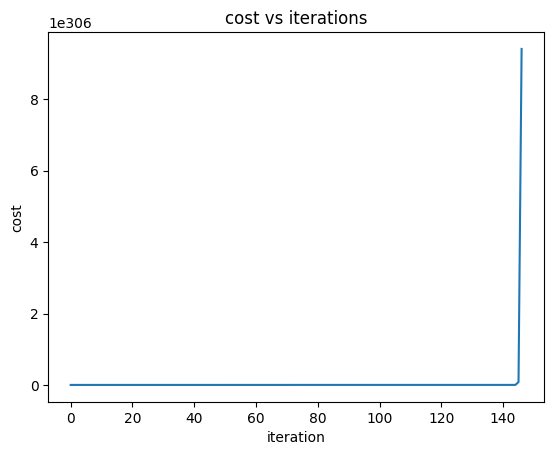

In [52]:
plt.plot(history)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title("cost vs iterations")
plt.show()

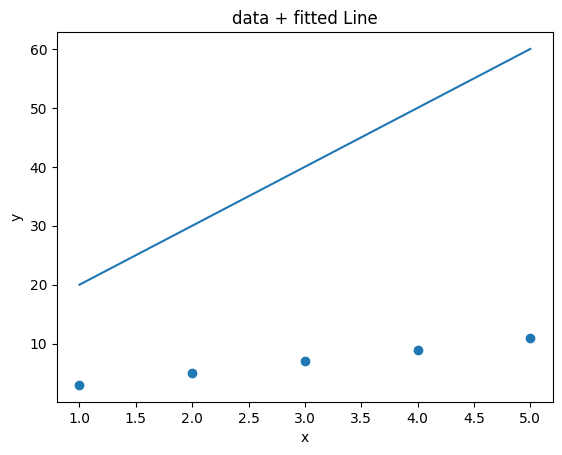

In [53]:
plt.scatter(x, y)
plt.plot(x, w*x +b)
plt.xlabel('x')
plt.ylabel('y')
plt.title("data + fitted Line")
plt.show()

0.5263188971192655 6.3207132314846275 2.5764389780214243


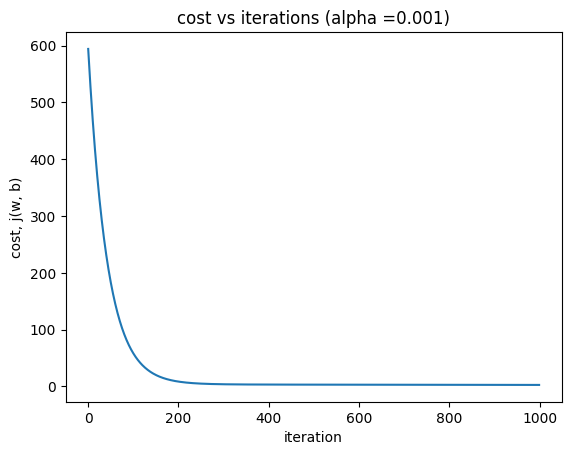

1.9999999312271766 1.0000002482917139 5.610577825559687e-15


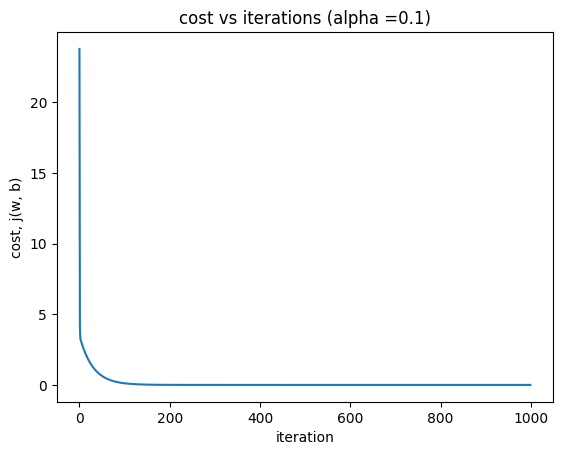

divereg at iteration 147
1.3165933575901917e+154 3.64675248410102e+153 9.411581027226042e+306


C:\Users\Rubel\AppData\Local\Temp\ipykernel_9900\523164999.py:7: RuntimeWarning: overflow encountered in scalar power
  cost = cost + (f_wb - y[i]) **2


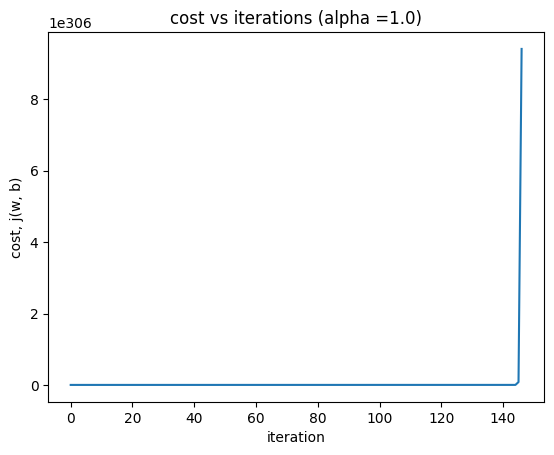

In [57]:

alphas = [0.001, 0.1, 1.0]
for i in alphas: 
    w0 , b0  = 0.0, 0.0

    history, w_Final, b_final = gradient_descent(1000, i, w, b, x, y)
    print(w_Final, b_final, history[-1])
    # plt.figure()
    plt.plot(history)
    plt.xlabel('iteration')
    plt.ylabel('cost, j(w, b)')
    plt.title(f"cost vs iterations (alpha ={i})")
    plt.show()
    


C:\Users\Rubel\AppData\Local\Temp\ipykernel_9900\2241178217.py:13: RuntimeWarning: overflow encountered in scalar power
  cost += (f - y[i])**2


Diverged at iteration 147 for alpha=1.0
alpha=0.1 final: 1.9423286586763755 1.2082118411957932 final cost: 0.003945426778765452
alpha=1.0 final: 1.3165933575901917e+154 3.64675248410102e+153 final cost: inf


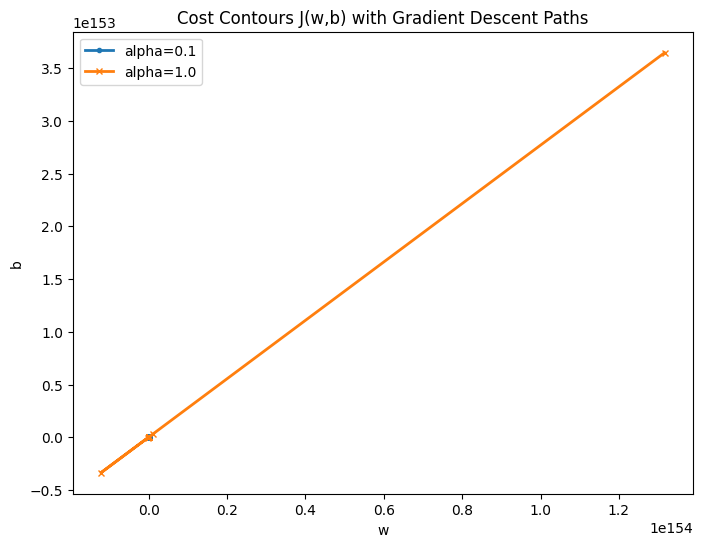

c:\Users\Rubel\anaconda3\envs\visa\Lib\site-packages\matplotlib\scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


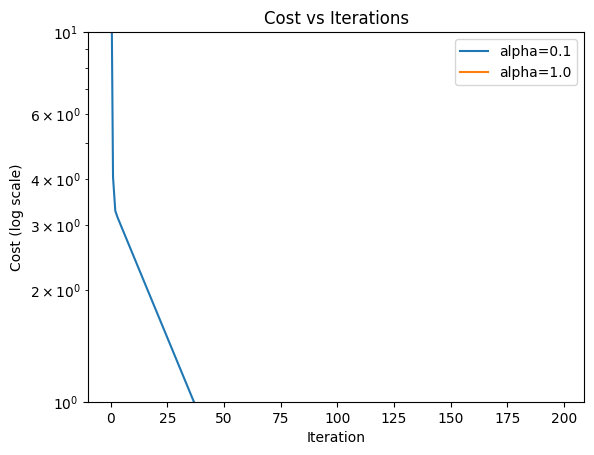

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([3, 5, 7, 9, 11], dtype=float)

def compute_cost(w, b, x, y):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f = w * x[i] + b
        cost += (f - y[i])**2
    return cost / (2*m)

def compute_gradient(w, b, x, y):
    m = x.shape[0]
    dj_dw = 0.0
    dj_db = 0.0
    for i in range(m):
        f = w * x[i] + b
        err = f - y[i]
        dj_dw += err * x[i]
        dj_db += err
    return dj_dw / m, dj_db / m

def gradient_descent(iters, alpha, w0, b0, x, y):
    w, b = w0, b0
    cost_history = []
    w_history = []
    b_history = []
    
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(w, b, x, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = compute_cost(w, b, x, y)
        cost_history.append(cost)
        w_history.append(w)
        b_history.append(b)

        if np.isnan(cost) or np.isinf(cost):
            print(f"Diverged at iteration {i} for alpha={alpha}")
            break
            
    return np.array(cost_history), np.array(w_history), np.array(b_history), w, b

# --- Run two paths ---
w0, b0 = 10.0, 10.0
iters = 200  # keep small so the diverging case doesn't blow up too hard

cost_01, w_01, b_01, wf01, bf01 = gradient_descent(iters, 0.1, w0, b0, x, y)
cost_10, w_10, b_10, wf10, bf10 = gradient_descent(iters, 1.0, w0, b0, x, y)

print("alpha=0.1 final:", wf01, bf01, "final cost:", cost_01[-1])
print("alpha=1.0 final:", wf10, bf10, "final cost:", cost_10[-1] if len(cost_10)>0 else None)

# --- Build cost surface grid for contour plot ---
w_vals = np.linspace(-1, 5, 200)
b_vals = np.linspace(-1, 7, 200)
W, B = np.meshgrid(w_vals, b_vals)

J = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J[i, j] = compute_cost(W[i, j], B[i, j], x, y)

# --- Plot contour + paths ---
plt.figure(figsize=(8, 6))
levels = np.logspace(-3, 3, 20)  # log contours to see both small & large values
plt.contour(W, B, J, levels=levels)
plt.xlabel("w")
plt.ylabel("b")
plt.title("Cost Contours J(w,b) with Gradient Descent Paths")

# Path for alpha=0.1
plt.plot(w_01, b_01, marker="o", markersize=3, linewidth=2, label="alpha=0.1")

# Path for alpha=1.0
plt.plot(w_10, b_10, marker="x", markersize=4, linewidth=2, label="alpha=1.0")

plt.legend()
plt.show()

# --- Plot cost vs iterations for both ---
plt.figure()
plt.plot(cost_01, label="alpha=0.1")
plt.plot(cost_10, label="alpha=1.0")
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Cost (log scale)")
plt.title("Cost vs Iterations")
plt.legend()
plt.show()
